In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

digits = load_digits()

plt.imshow(digits.images[123])

nDigits, nPixels = digits.data.shape

In [2]:
def displayDigits(nImages):
    """INPUT -> nImages, Integer to indicat how many images to display
    
    Displays nImages randomly selected images int he digits data set"""
    # function to get factors of a integer
    def factors(n):    
        return set(reduce(list.__add__, 
                    ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))
    
    # Choosing how many rows and columsn to disply
    fact = sorted(list(factors(nImages)))
    nCols = fact[len(fact)/2]
    nRows = nImages/nCols
    
    # Choosing images to display randomly
    diplayIdx = np.random.randint(nDigits, size=nImages)
    
    # Displaying images
    for i in range(len(diplayIdx)):
        p = plt.subplot(nRows,nCols,i+1)
        p.axis('off')
        plt.imshow(digits.images[diplayIdx[i]], cmap="gray")      

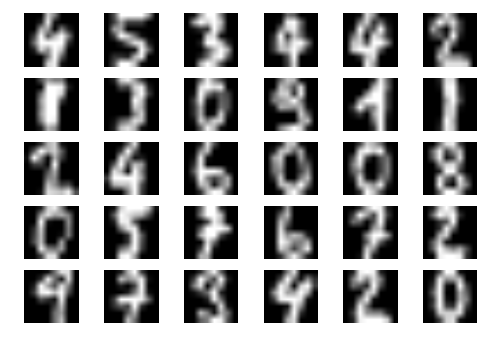

In [3]:
%matplotlib inline
nImages = 30
displayDigits(nImages)  

In [18]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

nn = MLPClassifier(solver='adam', 
                   alpha=1e-6, 
                   hidden_layer_sizes=(2**11), 
                   activation="tanh",
                   max_iter=10000,
                   batch_size=X_train.shape[0])

nn.fit(X_train, y_train)

y_hat = nn.predict(X_test)

In [ ]:
print "Accuracy: %0.1f%%" % (sum(y_hat==y_test)*100.0/len(y_hat))

numPredictions = len(y_test)
numDisplayedPred = 8

plt.figure(figsize=[8,2.5])
for i in range(numDisplayedPred):
    idx = np.random.randint(numPredictions)
    img = X_test[idx].reshape([8,8])
    p = plt.subplot(1, numDisplayedPred, i+1)
    p.axis("off")
    plt.imshow(img, cmap="gray")
    plt.title("Pred: {}\nTrue: {}".format(y_hat[idx],y_test[idx]))
plt.suptitle('Predictions')
plt.tight_layout()


Accuracy: 99.2%
